In this part, we shall conduct data analysis to try and understand if the magnitude of the reward associated with a particular stimulus plays a role in shaping the learning process and subsequently, on memory. This would give us an idea of whether higher reward or punishment causes greater tendency to approach/stay averse of an object. 

#### Learning and the Magnitutde of Reward associated with the Stimulus.
- **$H_0$:** There is no relation between the magnitute of reward associated with a particular stimulus and the learning about the stimulus. 
<br>

- **$H_1$:** Higher the magnitude of the reward associated with a stimulus, better the subject learns to avoid/approach the stimulus.


#### Memory and the Magnitutde of Reward associated with the Stimulus.

- **$H_0$:** There is no relation between the magnitute of reward associated with a particular stimulus and the memory associated with the stimulus. 
<br>

- **$H_2$:** Higher the magnitude of the reward associated with a stimulus, better the subject remembers the stimulus.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

### Importing Datasets


In [4]:
e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")
e1_learning = e1_learning.dropna()
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


First we do an exploratory data analysis and visualisations on the data to get an idea of how the variables interact.

#### Correlation between magnitude of reward and the Percentage correct response.

In [6]:
# create new variable e1_learning_b2 where only those entries are there where the column block_condition is equal to 2
e1_learning_b2 = e1_learning[e1_learning['block_condition'] == 2]
e1_learning_b2.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

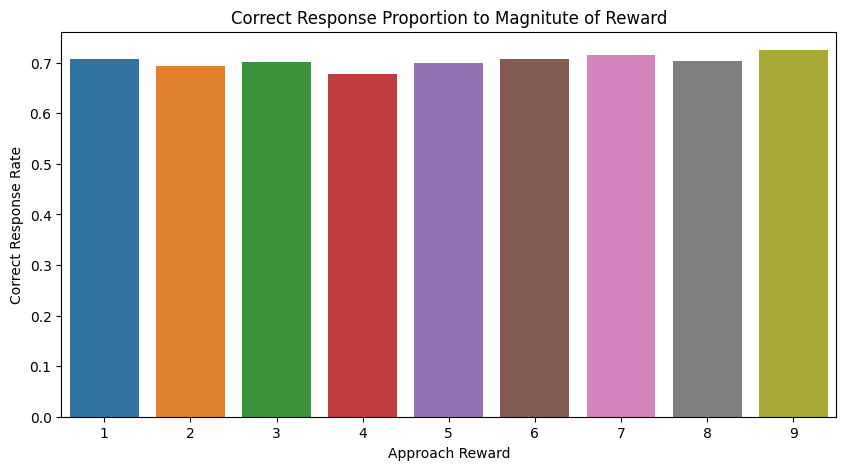

PearsonRResult(statistic=0.5407957108534478, pvalue=0.1327339444907063)


In [26]:
# create an empty dictionary called RvsC

RvsC = {}
R_ctr = {}
for index, row in e1_learning_b2.iterrows():
    if abs(int(row['approach_reward'])) in R_ctr:
        R_ctr[abs(int(row['approach_reward']))] += 1
        if row['correct_response_made'] == 1:
            RvsC[abs(int(row['approach_reward']))] += 1
        
    else:
        R_ctr[abs(int(row['approach_reward']))] = 1
        RvsC[abs(int(row['approach_reward']))] = 0
        if row['correct_response_made'] == 1:
            RvsC[abs(int(row['approach_reward']))] += 1

    
for key,value in RvsC.items():
    RvsC[key] = value/R_ctr[key]

# sort the dictionary RvsC in ascending order
RvsC = dict(sorted(RvsC.items(), key=lambda x: int(x[0])))

# plot a bargraph depicting the correct response made to each approach reward, sort the x-axis in ascending order
plt.figure(figsize=(10,5))
sns.barplot(x=list(RvsC.keys()), y=list(RvsC.values()))
plt.xlabel('Approach Reward')
plt.ylabel('Correct Response Rate')
plt.title('Correct Response Proportion to Magnitute of Reward')

plt.show()

# check if there exists a correlation between the approach reward and the correct response made

correlation = stats.pearsonr(list(RvsC.keys()), list(RvsC.values()))
print(correlation)


Hence, the initial hypothesis testing tells us that there is no significant correlation between the magnitude of reward and the percentage of correct responses as we cannot reject the null hypothesis. 